In [2]:
#Name: Qifan Chen
#USCID: 9166932624
#Github: cqftx001


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
attributes = ['pelvic incidence', 'eplvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis', 'status']

dataset1 = pd.read_csv('column_2C.dat', skiprows = 1, sep = '\s+')
dataset1.rename(columns=dict(zip(dataset1.columns, attributes)), inplace=True)
dataset1.head()


,pelvic incidence,eplvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,status
0,68.83,22.22,50.09,46.61,105.99,-3.53,AB
1,69.30,24.65,44.31,44.64,101.87,11.21,AB
2,49.71,9.65,28.32,40.06,108.17,7.92,AB
3,40.25,13.92,25.12,26.33,130.33,2.23,AB
4,53.43,15.86,37.17,37.57,120.57,5.99,AB


In [5]:
dataset1.replace('AB', '1', inplace=True)  # replace the abnormal with 1
dataset1.replace('NO', '0', inplace=True)  # replace the normal with 0

# filter the data with status == 1, which is abnormal
dataset1[dataset1['status'] == '1'].describe()



,pelvic incidence,eplvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,64.823365,19.824567,56.152212,44.999231,115.159471,38.120096
std,17.656408,10.542865,19.612610,14.539572,14.112558,40.740549
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-10.680000
25%,50.175000,13.062500,41.830000,34.380000,107.562500,7.942500
50%,65.605000,18.795000,56.395000,44.820000,115.800000,32.315000
75%,77.667500,24.837500,68.265000,55.157500,123.197500,55.570000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


In [6]:
#filt the data with status == 0, which is normal
dataset1[dataset1['status'] == '0'].describe()

,pelvic incidence,eplvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
count,100.0000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,51.6856,12.821800,43.542300,38.863800,123.891200,2.18700
std,12.3679,6.778658,12.361581,9.623776,9.013755,6.30702
min,30.7400,-5.850000,19.070000,17.390000,100.500000,-11.06000
25%,42.8200,8.802500,35.000000,32.342500,118.180000,-1.51000
50%,50.1250,13.485000,42.640000,37.060000,123.875000,1.15500
75%,61.4725,16.787500,51.602500,44.605000,129.040000,4.96750
max,89.8300,29.890000,90.560000,67.200000,147.890000,31.17000


In [6]:
#save data into numpy
dataset1.iloc[:, 0:6].head(10)

,pelvic incidence,eplvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,68.83,22.22,50.09,46.61,105.99,-3.53
1,69.30,24.65,44.31,44.64,101.87,11.21
2,49.71,9.65,28.32,40.06,108.17,7.92
3,40.25,13.92,25.12,26.33,130.33,2.23
4,53.43,15.86,37.17,37.57,120.57,5.99
5,45.37,10.76,29.04,34.61,117.27,-10.68
6,43.79,13.53,42.69,30.26,125.00,13.29
7,36.69,5.01,41.95,31.68,84.24,0.66
8,49.71,13.04,31.33,36.67,108.65,-7.83
9,31.23,17.72,15.50,13.52,120.06,0.50


In [7]:
#preprocess the data

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [8]:
def corrfunc(x, y, ax=None, hue = None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)


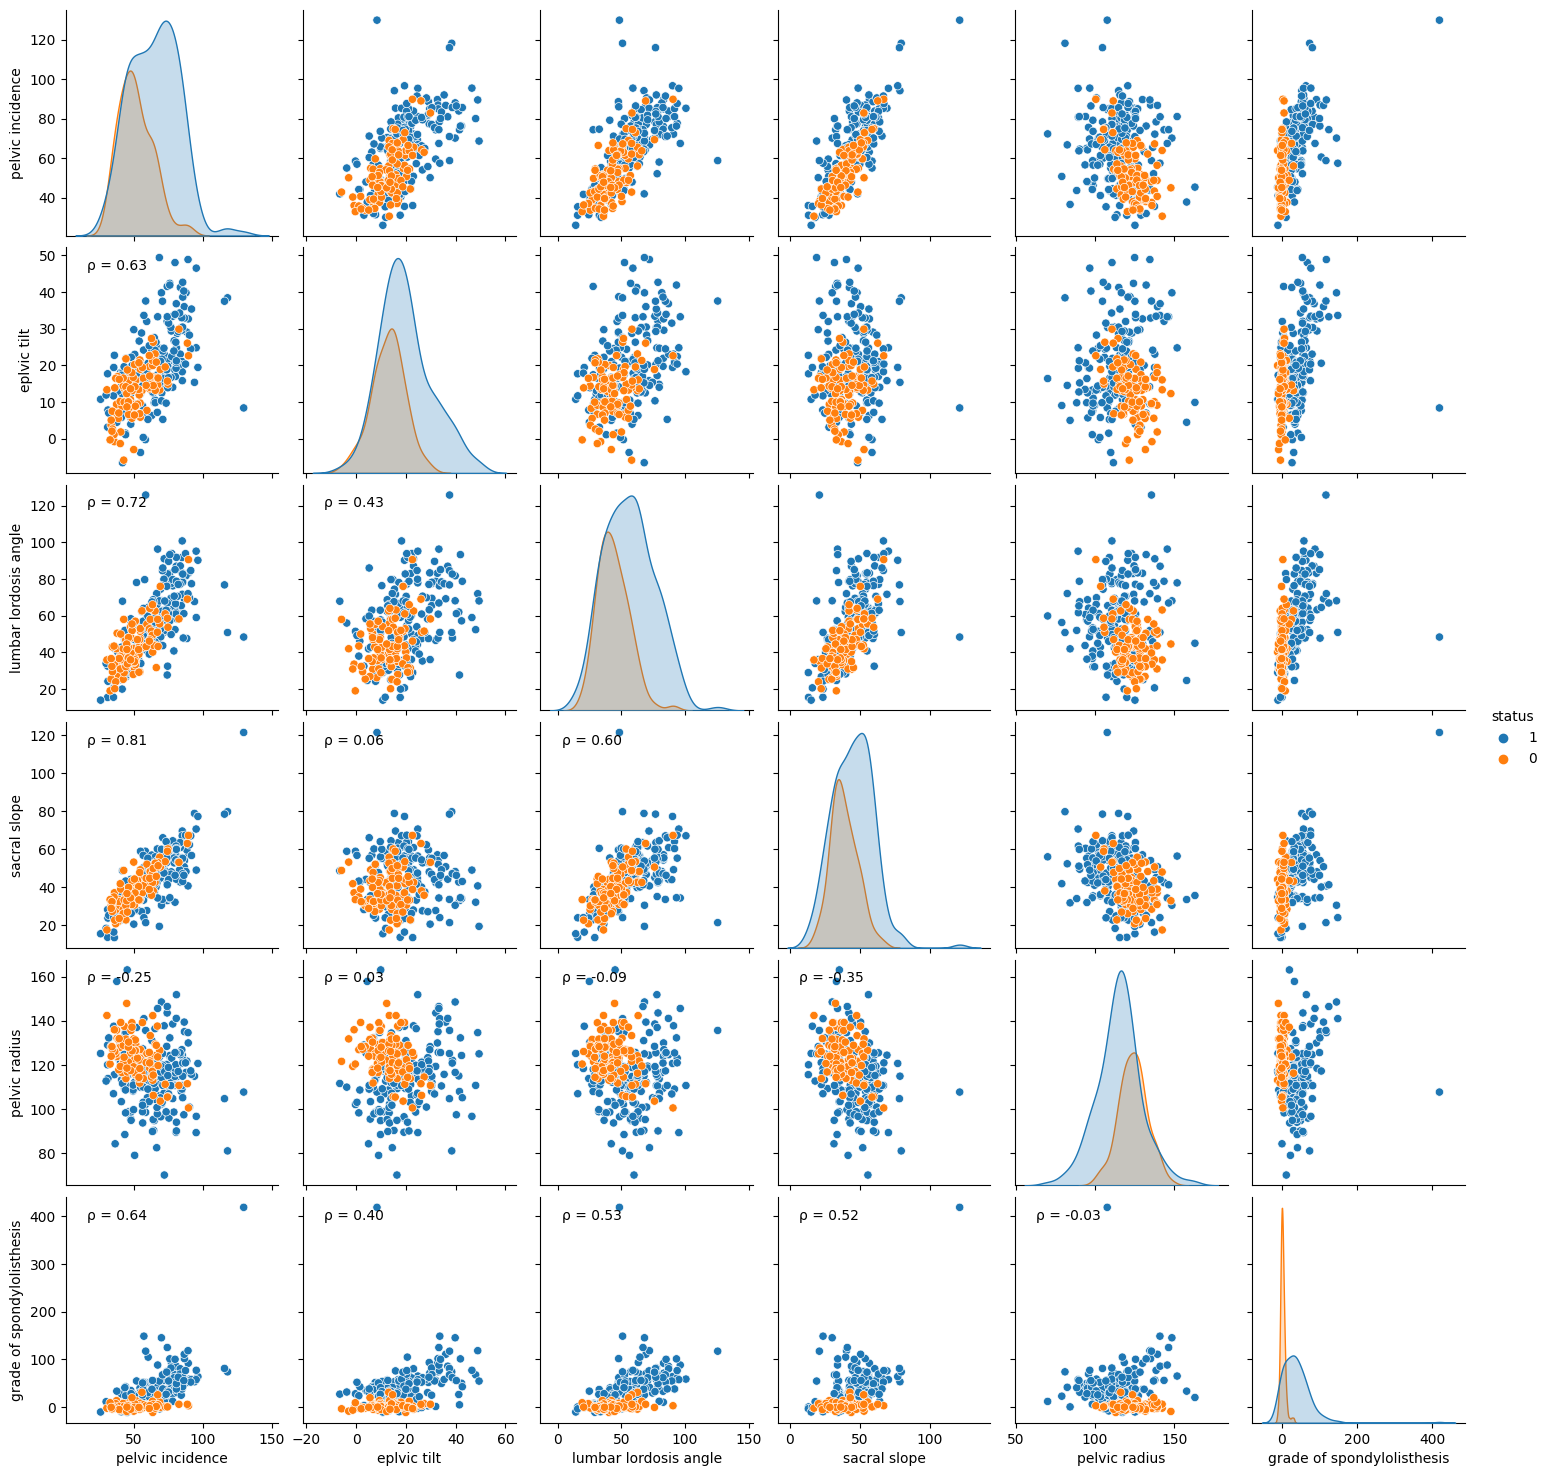

In [10]:

#scatterplot the dataset
#g = sns.PairGrid(dataset1, hue = 'status')
#g.map_lower(corrfunc)
#g.map_upper(sns.scatterplot)
#g.map_diag(sns.kdeplot, fill = True)

#g.add_legend()
#plt.show()
g = sns.pairplot(dataset1, hue = 'status')
g.map_lower(corrfunc)
plt.show()

In [11]:

attributes

['pelvic incidence',
 'eplvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'status']

In [12]:
print("--------------------------")
i, j = divmod(6, 3)
print(i)
print(j)
print("--------------------------")

--------------------------
2
0
--------------------------


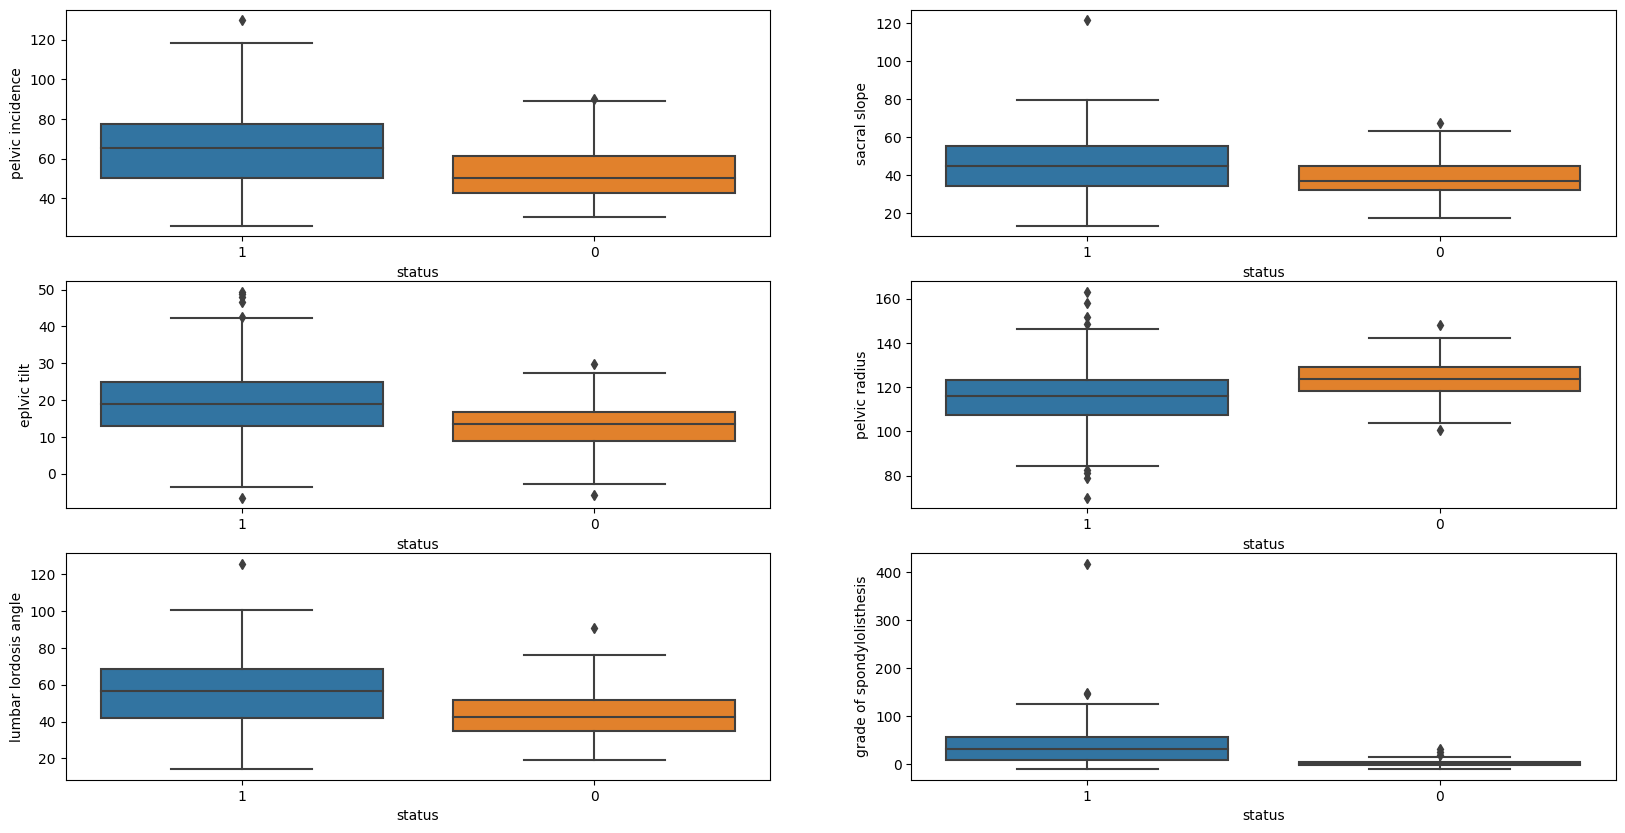

In [13]:
fig, axs = plt.subplots(3,2, figsize = (20,10))

for i, name in enumerate(attributes[:6]):
  c, r = divmod(i, 3)
  sns.boxplot(y= name, x= 'status', data=dataset1, orient = 'v', ax = axs[r,c]) #boxplt an indep var with both classes

plt.show()


In [14]:
print("--------------------------")
print('status 0 size ={}\nstatus 1 = {}'.format(dataset1[dataset1['status']=='0'].shape,
                                              dataset1[dataset1['status']=='1'].shape))
len(dataset1[dataset1['status']=='1'])
print("--------------------------")


--------------------------
status 0 size =(100, 7)
status 1 = (208, 7)
--------------------------


In [15]:
from sklearn.model_selection import train_test_split
train_data_0,test_data_0 = train_test_split(dataset1[dataset1['status']=='0'],
                                      train_size = 0.7,
                                      random_state=42)
train_data_1,test_data_1 = train_test_split(dataset1[dataset1['status']=='1'],
                                      train_size = 140/len(dataset1[dataset1['status']=='1']),
                                      random_state=42)
print("--------------------------")
print('status 0\n train_data size ={}\ntest_data size= {}'.format(train_data_0.shape,
                                              test_data_0.shape))
print('__________________________________')
print('status 1\n train_data size ={}\ntest_data size= {}'.format(train_data_1.shape,
                                              test_data_1.shape))
print("--------------------------")

--------------------------
status 0
 train_data size =(70, 7)
test_data size= (30, 7)
__________________________________
status 1
 train_data size =(140, 7)
test_data size= (68, 7)
--------------------------


In [16]:
from sklearn.utils import shuffle
#joining both training dataset in one matrix
train_data = pd.concat([train_data_1, train_data_0])
train_data = shuffle(train_data, random_state = 42, )
#joining both test dataset in one matrix
test_data = pd.concat([test_data_1, test_data_0])
test_data = shuffle(test_data, random_state = 42)
print('X_train size ={}\nX_test size = {}'.format(train_data.shape,
                                              test_data.shape))
train_data.head(20)

X_train size =(210, 7)
X_test size = (98, 7)


,pelvic incidence,eplvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,status
137,85.10,21.07,91.73,64.03,109.06,38.03,1
262,54.50,6.82,47.00,47.68,111.79,-4.41,0
7,36.69,5.01,41.95,31.68,84.24,0.66,1
295,45.58,18.76,33.77,26.82,116.80,3.13,0
136,72.05,24.70,79.87,47.35,107.17,56.43,1
227,43.44,10.10,36.03,33.34,137.44,-3.11,0
119,83.88,23.08,87.14,60.80,124.65,80.56,1
266,57.15,16.49,42.84,40.66,113.81,5.02,0
76,67.41,17.44,60.14,49.97,111.12,33.16,1
229,53.91,12.94,39.00,40.97,118.19,5.07,0


In [18]:
train_data

,pelvic incidence,eplvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,status
137,85.10,21.07,91.73,64.03,109.06,38.03,1
262,54.50,6.82,47.00,47.68,111.79,-4.41,0
7,36.69,5.01,41.95,31.68,84.24,0.66,1
295,45.58,18.76,33.77,26.82,116.80,3.13,0
136,72.05,24.70,79.87,47.35,107.17,56.43,1
...,...,...,...,...,...,...,...
174,67.03,13.28,66.15,53.75,100.72,33.99,1
26,44.55,21.93,26.79,22.62,111.07,2.65,1
13,44.32,12.54,36.10,31.78,124.12,5.42,1
305,61.45,22.69,46.17,38.75,125.67,-2.71,0


In [19]:
#now seperate the features from the labels and convert it into numpy
X_train = train_data.iloc[:, :-1].values
X_test = test_data.iloc[:, :-1].values
y_train = train_data.iloc[:, 6].values
y_test = test_data.iloc[:, 6].values

In [22]:
#Preprocess the training and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
scores = [] #store all errors
for k in range(208,0,-3):
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

print(scores)

[0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.6938775510204082, 0.7551020408163265, 0.7653061224489796, 0.7755102040816326, 0.7755102040816326, 0.7653061224489796, 0.7551020408163265, 0.7755102040816326, 0.7448979591836735, 0.7448979591836735, 0.7346938775510204, 0.7551020408163265, 0.7551020408163265, 0.7551020408163265, 0.7448979591836735, 0.7448979591836735, 0.7653061224489796, 0.7755102040816326, 0.7653061224489796, 0.7959183673469388, 0.7857142857142857, 0.8061224489795918, 0.8163265306122449, 0.8163265306122449,

Text(0, 0.5, 'Accuracy Test')

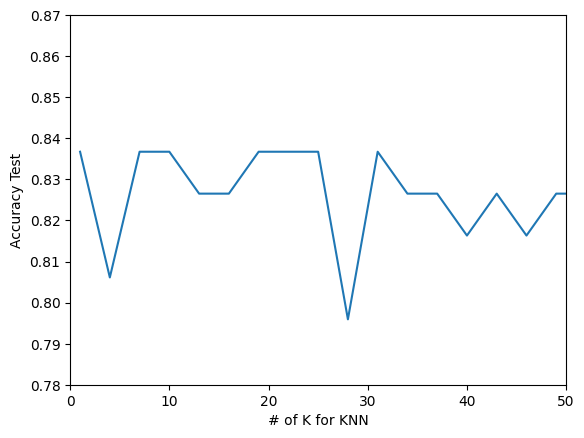

In [24]:
plt.plot(range(208,0,-3), scores)
plt.axis([0, 50, 0.78, 0.87])
plt.xlabel('# of K for KNN')
plt.ylabel('Accuracy Test')

In [25]:

#choose k at 7 as it has higher accuracy using Euclidean distance
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test) #the estimated output

In [26]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print('________________________________')

#calc the True -ve, False -ve, True +ve, False +ve
TN = result[0][0]
FN = result[1][0]
TP = result[1][1]
FP = result[0][1]

TPR = TP/(TP+FN) #True Positive Rate
FPR = FP/(FP+TN) #False Positive Rate
print("True Positive Rate: {}\nFalse Positive Rate: {}".format(TPR,FPR))
print('________________________________')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
print('________________________________')
result2 = accuracy_score(y_test,y_pred) # we can find as following (TP+TN)/(TP+FP+FN+TN) instead of the function
print("Accuracy:",result2)

Confusion Matrix:
[[22  8]
 [ 8 60]]
________________________________
True Positive Rate: 0.8823529411764706
False Positive Rate: 0.26666666666666666
________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        30
           1       0.88      0.88      0.88        68

    accuracy                           0.84        98
   macro avg       0.81      0.81      0.81        98
weighted avg       0.84      0.84      0.84        98

________________________________
Accuracy: 0.8367346938775511


the size of training data: 20
the optimal k value: 6
score: 0.7857142857142857
_______________________________
the size of training data: 30
the optimal k value: 6
score: 0.8061224489795918
_______________________________
the size of training data: 40
the optimal k value: 6
score: 0.8571428571428571
_______________________________
the size of training data: 50
the optimal k value: 6
score: 0.8163265306122449
_______________________________
the size of training data: 60
the optimal k value: 16
score: 0.8163265306122449
_______________________________
the size of training data: 70
the optimal k value: 6
score: 0.8367346938775511
_______________________________
the size of training data: 80
the optimal k value: 6
score: 0.8469387755102041
_______________________________
the size of training data: 90
the optimal k value: 16
score: 0.826530612244898
_______________________________
the size of training data: 100
the optimal k value: 11
score: 0.8367346938775511
______________________________

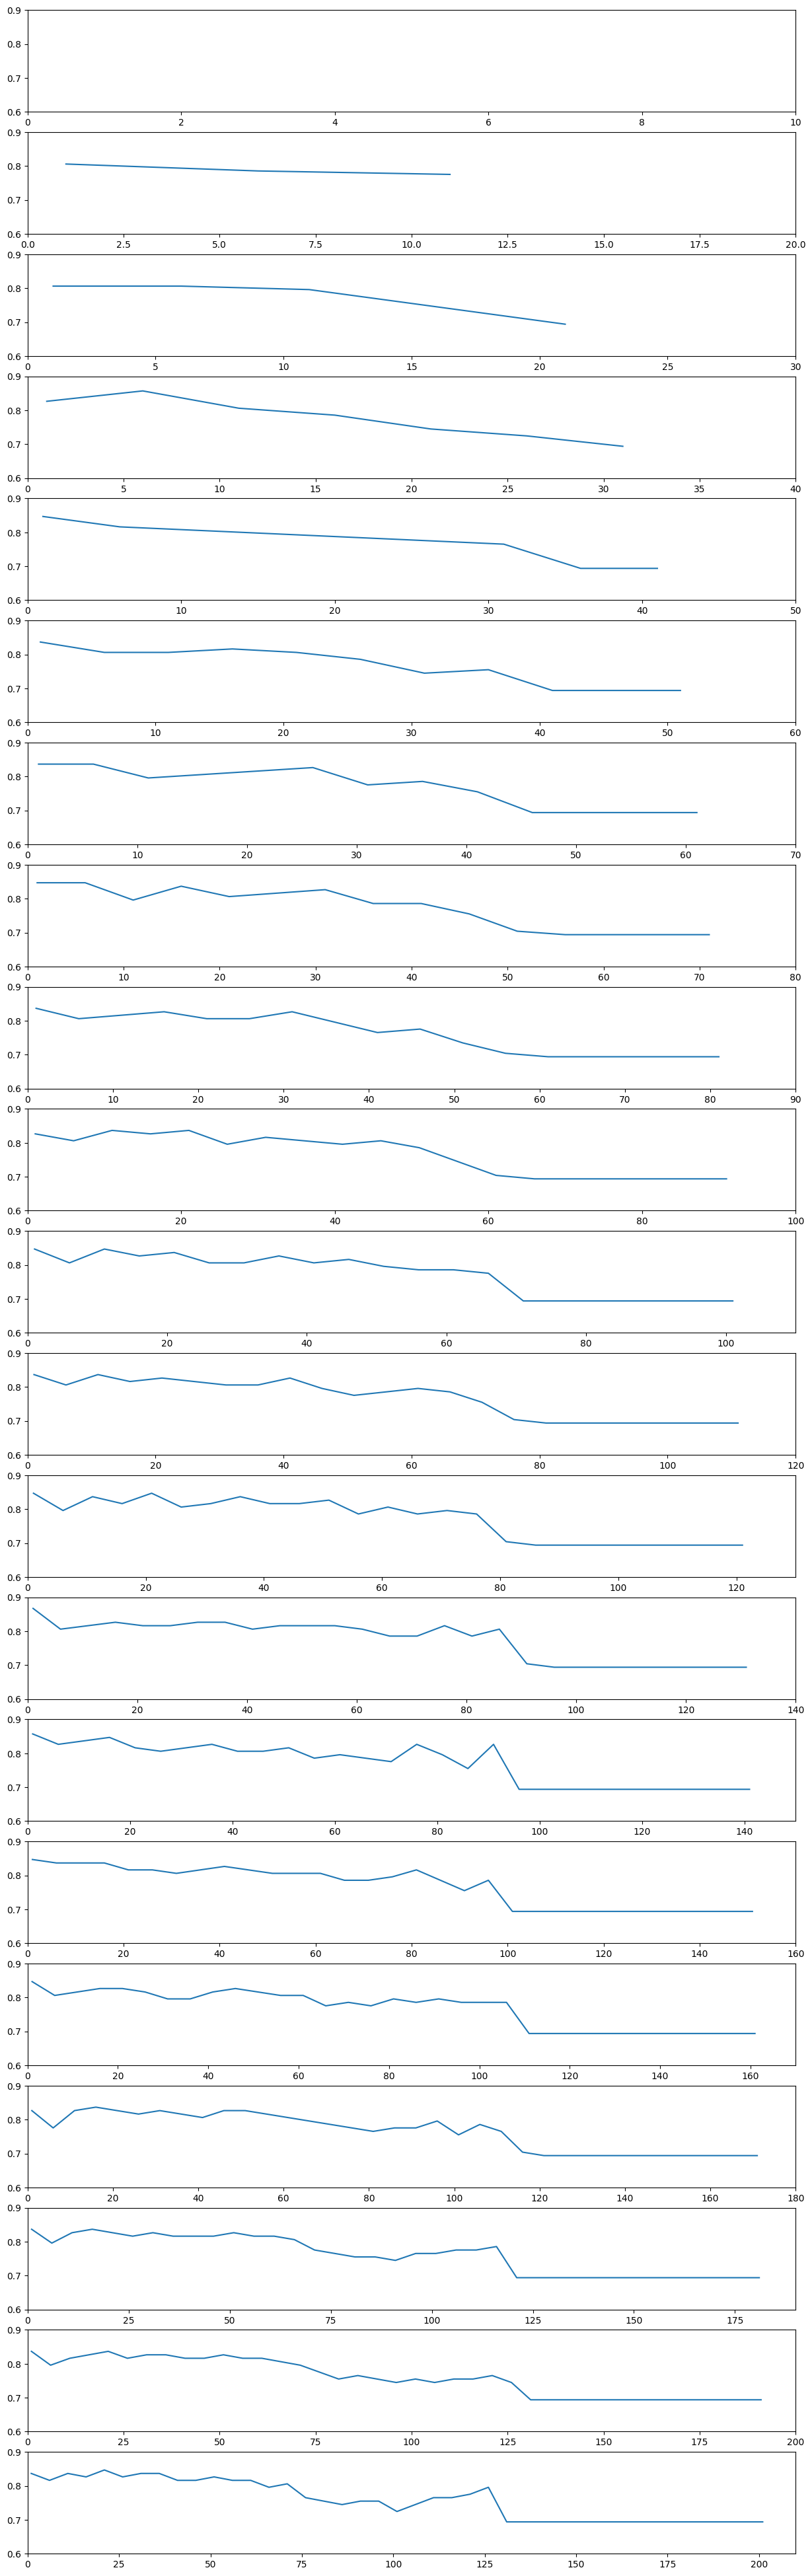

In [27]:
N_train = range(10, 211, 10)
k_range = range(196, 0, -5)

fig, axs = plt.subplots(len(N_train), 1, figsize=(15, 50))

for i, N in enumerate(N_train):
    # set the interval and store it
    train_data_0_mod = train_data_0[:round(N / 3)][:]
    train_data_1_mod = train_data_1[:round(2 * N / 3)][:]
    # joining both training datasets into one matrix
    train_data = pd.concat([train_data_1_mod, train_data_0_mod])
    train_data = shuffle(train_data, random_state=42)
    # separate the features and labels
    X_train = train_data.iloc[:, :-1].values
    y_train = train_data.iloc[:, 6].values
    ##preprocess the data. Note: I should have preprocessed the data first so I can avoid some extra steps
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    # KNN classifier
    scores = []
    max_score = -1
    opt_k = None  # Initialize opt_k variable
    for k in range(1, N - 4, 5):
        # print(k)
        classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)
        # find the optimal k
        if k != 1:
            if score > max_score:
                max_score = score
                opt_k = k

    if scores[1:] != []:  # avoid an empty set
        print("the size of training data: {}\nthe optimal k value: {}\nscore: {}".format(N, opt_k, max(scores[1:])))
        print('_______________________________')

    # if scores[2:] != []:
    #  max_score = max(scores[2:])
    #  opt_k = 1+scores.index(max_score)*5 # k from (1, N-4)
    #  print("training data size: {}\nthe optimal k: {}".format(N,opt_k))

    # plot the scores
    axs[i].plot(range(1, N - 4, 5), scores)
    axs[i].axis([0, N, 0.6, 0.9])

plt.show()


In [28]:
#A>>
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=1) #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)

  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("--------------------------")
print("Manhattan Distance Metric:")
print("the optimal k value: {}\nscore: {}".format(opt_k,max(scores[1:])))
print("--------------------------")

--------------------------
Manhattan Distance Metric:
the optimal k value: 16
score: 0.8367346938775511
--------------------------


In [29]:
#B>>
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=16) #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)

  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("--------------------------")
print("Minkowski Distance Metric with log10(p):")
print("the optimal k value: {}\nscore: {}".format(opt_k,max(scores[1:])))
print("--------------------------")

--------------------------
Minkowski Distance Metric with log10(p):
the optimal k value: 11
score: 0.8673469387755102
--------------------------


In [30]:
#C>>
from math import inf
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=inf) #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)

  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("--------------------------")
print("Chebyshev Distance Metric:")
print("the optimal k value: {}\nscore: {}".format(opt_k,max(scores[1:])))
print("--------------------------")

--------------------------
Chebyshev Distance Metric:
the optimal k value: 11
score: 0.8673469387755102
--------------------------


In [31]:
#from sklearn.neighbors import NearestNeighbors
#the covariance of X_train matrix
X_train_cov = np.cov(X_train, rowvar=False)
scores = [] #store all errors
max_score = -1
opt_k=0

for k in range(1,196,5):
  #classifier mahalanobis
  classifier = KNeighborsClassifier(n_neighbors = k, algorithm='auto', metric='mahalanobis',
              metric_params={'VI': X_train_cov})
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)

  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("--------------------------")
print("Mahalanobis Distance Metric:")
print("the optimal k value: {}\nscore: {}".format(opt_k,max(scores[1:])))
print("--------------------------")

--------------------------
Mahalanobis Distance Metric:
the optimal k value: 11
score: 0.826530612244898
--------------------------


In [32]:
#Euclidean
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'distance') #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)

  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("--------------------------")
print("Manhattan Distance Metric:")
print("the optimal k value: {}\nscore: {}".format(opt_k,max(scores[1:])))
print("--------------------------")

--------------------------
Manhattan Distance Metric:
the optimal k value: 21
score: 0.8775510204081632
--------------------------


In [33]:
#Manhattan
#A>>
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=1, weights = 'distance') #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)

  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("--------------------------")
print("Manhattan Distance Metric:")
print("the optimal k value: {}\nscore: {}".format(opt_k,max(scores[1:])))
print("--------------------------")

--------------------------
Manhattan Distance Metric:
the optimal k value: 146
score: 0.8571428571428571
--------------------------


In [34]:
#Chebyshev
#C>>
from math import inf
scores = [] #store all errors
max_score = -1
opt_k=0
for k in range(1,196,5):
  classifier = KNeighborsClassifier(n_neighbors = k, p=inf, weights = 'distance') #metric is minkoski by default
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)

  score = accuracy_score(y_test, y_pred)
  scores.append(score)
  #find the optimal k
  if k!=1:
    if score > max_score:
      max_score = score
      opt_k = k

print("--------------------------")
print("Chebyshev Distance Metric:")
print("the optimal k value: {}\nscore: {}".format(opt_k,max(scores[1:])))
print("--------------------------")

--------------------------
Chebyshev Distance Metric:
the optimal k value: 16
score: 0.8571428571428571
--------------------------


In [ ]:
# question (f):
# Answer: 0.83